In [3]:
import pandas as pd
import pandas as pd
from googletrans import Translator
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
df2=pd.read_json('bayernpsg_small.json', encoding='utf8')

In [45]:
df=df2.copy()

# RICERCA BOT

In [46]:
gruppo=df.groupby('user_id').count()

In [47]:
gruppo2=gruppo.sort_values(['date'], ascending=False)

In [48]:
gruppo2.head(10)

,_id,date,is_RT,location,text,username
user_id,,,,,,
1291357944374792192,217,217,217,0,217,217
1293673554089840640,176,176,176,0,176,176
1276482568846704640,170,170,170,170,170,170
872281895664582656,139,139,139,139,139,139
1292067865139585024,105,105,105,0,105,105
2788699456,89,89,89,0,89,89
1666547678,87,87,87,87,87,87
4289217222,73,73,73,73,73,73
723174686,73,73,73,73,73,73


In [49]:
df.loc[df.user_id == 1291357944374792192]

,_id,date,is_RT,location,text,user_id,username
6852,{'$oid': '5f42ad7f7737102f014ca50d'},2020-08-23 17:55:06,True,None,"neymar ou ""neymonstro"", ""neymito"", ""neymagic"" ...",1291357944374792192,Neymar Bot
7655,{'$oid': '5f42ad8f7737102f014ca830'},2020-08-23 17:55:22,True,None,Neymar entrando com Só Love\n\nJogadores do Ba...,1291357944374792192,Neymar Bot
9182,{'$oid': '5f42adae7737102f014cae27'},2020-08-23 17:55:52,True,None,Only Neymar would show up to the Champions Lea...,1291357944374792192,Neymar Bot
13171,{'$oid': '5f42adfe7737102f014cbdbc'},2020-08-23 17:57:12,True,None,Torcendo pra 1. Ser jogão 2. Lotado de gols 3....,1291357944374792192,Neymar Bot
14197,{'$oid': '5f42ae127737102f014cc1be'},2020-08-23 17:57:33,True,None,¡Neymar prendió la fiesta! 🇧🇷🕺 https://t.co/h9...,1291357944374792192,Neymar Bot
...,...,...,...,...,...,...,...
503286,{'$oid': '5f42d4487737102f0154384b'},2020-08-23 20:40:35,True,None,A Neymar ya nadie le cree,1291357944374792192,Neymar Bot
518643,{'$oid': '5f42d57b7737102f01547448'},2020-08-23 20:45:42,True,None,@toskofacts Mazluma bak oturduğu yerden Neymar...,1291357944374792192,Neymar Bot
519158,{'$oid': '5f42d5857737102f0154764b'},2020-08-23 20:45:52,True,None,neymar pelo amor de deus me ajuda a te ajudar,1291357944374792192,Neymar Bot
527366,{'$oid': '5f42d6297737102f0154965b'},2020-08-23 20:48:36,True,None,Jeg håber Neymar scorer et mål dybt ind i over...,1291357944374792192,Neymar Bot


In [50]:
df=df.loc[df.user_id != 1291357944374792192]

In [36]:
df=df.loc[df.user_id !=1293673554089840640]

In [37]:
df=df.loc[df.user_id !=1276482568846704640]

In [38]:
df=df.loc[df.user_id !=872281895664582656]

In [39]:
df=df.loc[df.user_id !=1292067865139585024]

# PREPROCESSING

In [2]:
def clean(x):
    return str(x).encode('ascii', 'ignore').decode('UTF-8')

In [8]:
df.text=df.text.str.replace(r'[\U0001F600-\U0001F64F]', r'', regex=True)
df.text=df.text.str.replace(r'[\U0001F300-\U0001F5FF]', r'', regex=True)
df.text=df.text.str.replace(r'[\U0001F680-\U0001F6FF]', r'', regex=True)
df.text=df.text.str.replace(r'[\U0001F1E0-\U0001F1FF]', r'', regex=True)
df.text=df.text.str.replace(r'[\U0001F300-\U0001F5FF]', r'', regex=True)

#eliminazione emoji

In [9]:
df.text = df.text.str.lower() 
#convert text to lower-case

df.text=df.text.str.replace(r'((www\.[^\s]+)|(https?://[^\s]+))', r'', regex=True)
#toglie link

df.text=df.text.str.replace(r'@[^\s]+', r'', regex=True)
#toglie username

df.text=df.text.str.replace(r'\n', r' ', regex=True)
#sostituisce \n con spazio

df.text=df.text.str.replace(r'#([^\s]+)', r'\1', regex=True)
#toglie hashtag


In [10]:
df.text=df.text.str.replace(r'[.;:!\?,\"()\[\]+<>]', r'', regex=True)
df.text=df.text.str.replace(r'(<br\s*/><br\s*/>)|(\-)|(\/)', r' ', regex=True)

#elimina punteggiatura e simboli

In [22]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

emoticons = emoticons_happy.union(emoticons_sad)


emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

In [23]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
def clean_tweets(tweet):
 
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(tweet)
#after tweepy preprocessing the colon symbol left remain after      #removing mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
#replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
#remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)
#filter using NLTK library append it to a string
    filtered_tweet = [w for w in word_tokens if not w in stop_words]
    filtered_tweet = []
#looping through conditions
    for w in word_tokens:
#check tokens against stop words , emoticons and punctuations
        if w not in stop_words and w not in emoticons:
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)
    #print(word_tokens)
    #print(filtered_sentence)return tweet

In [25]:
df.text.apply(lambda x : clean_tweets(x))

0                          hoje pai em campo com neymar
1     readers spoken psg bayern munich combined uclf...
2     5 paris sg fifth french side reach european cu...
3     bayern side tasked winning uclfinal confident ...
4     best live stream paris saint germain bayern mu...
5     se neymar colocar baroes da pisadinha antes de...
6     neymar would show champions league final speak...
7     best live stream paris saint germain bayern mu...
8        ptddrr mais le bayern dj gagner ce foutu match
9     keylor navas back paris verratti among substit...
10            merayakansepakbola psg 1 2 bayern munchen
11                       bayern mnih 3 psg 1 fava bekle
12                                     kkkkkkkkkkk mano
13             il impose vraiment sa musique aux autres
14                hawi de vacaciones mis felicitaciones
15    neymar de juliet e moicano caminho estdio que ...
16    neymar escutando love kkkkkkkkkkkkkkkkkkkkkkkk...
17                          serge gnabry palmoli

In [ ]:
df['text'] = df['text'].apply(clean)

# TRADUZIONE

In [130]:
count = 0


def translate_text(x):
    global count
    count += 1
    print(count)

    
    translator = Translator()
    return translator.translate(str(x['text'])).text

In [ ]:
df['translated'] = df.apply(translate_text, axis=1)

# POLARITY

In [ ]:
def get_polarity(s):
    return TextBlob(s).sentiment.polarity

In [ ]:
df['polarity'] = df['translated'].apply(get_polarity)

# UNIONE DATASET

In [430]:
df25 = pd.read_csv('bayernpsg_translated_25.csv', sep = ',', index_col=None, header=0, engine='python' )
df75 = pd.read_csv('bayernpsg_translated_75.csv', sep = ',', index_col=None, header=0, engine='python' )
df150 = pd.read_csv('bayernpsg_translated_150.csv', sep = ',', index_col=None, header=0, engine='python' )
df225 = pd.read_csv('bayernpsg_translated_225.csv', sep = ',', index_col=None, header=0, engine='python' )
df275 = pd.read_csv('bayernpsg_translated_275 (1).csv', sep = ',', index_col=None, header=0, engine='python' )
df325 = pd.read_csv('bayernpsg_translated_325.csv', sep = ',', index_col=None, header=0, engine='python' )
df375 = pd.read_csv('bayernpsg_translated_375.csv', sep = ',', index_col=None, header=0, engine='python' )
df425 = pd.read_csv('bayernpsg_translated_425.csv', sep = ',', index_col=None, header=0, engine='python' )
df475 = pd.read_csv('bayernpsg_translated_475.csv', sep = ',', index_col=None, header=0, engine='python' )
df525 = pd.read_csv('bayernpsg_translated_525.csv', sep = ',', index_col=None, header=0, engine='python' )
df575 = pd.read_csv('bayernpsg_translated_575.csv', sep = ',', index_col=None, header=0, engine='python' )
df625 = pd.read_csv('bayernpsg_translated_625.csv', sep = ',', index_col=None, header=0, engine='python' )
df625a675 = pd.read_csv('bayernpsg_translated_625a675.csv', sep = ',', index_col=None, header=0, engine='python' )
df675 = pd.read_csv('bayernpsg_translated_675.csv', sep = ',', index_col=None, header=0, engine='python' )
df725 = pd.read_csv('bayernpsg_translated_725.csv', sep = ',', index_col=None, header=0, engine='python' )
df825 = pd.read_csv('bayernpsg_translated_825.csv', sep = ',', index_col=None, header=0, engine='python' )
df875 = pd.read_csv('bayernpsg_translated_875.csv', sep = ',', index_col=None, header=0, engine='python' )
dffine = pd.read_csv('bayernpsg_translated_finale.csv', sep = ',', index_col=None, header=0, engine='python' )


pdList = [df25, df75, df150, df225,df275, df325,df375, df425,df475, df525,df575, df625, df625a675, df675, df725,df825, df875,dffine]  # List of your dataframes
df_traduzioni = pd.concat(pdList)

In [567]:
df_traduzioni

,Unnamed: 0,_id,date,is_RT,location,polarity,text,translated,user_id,username
0,275001,{'$oid': '5f42c2727737102f0150bc85'},2020-08-23 19:24:29,False,NaN,0.000000,DiMaria sem perna destra,DiMaria sem perna destra,2.328318e+09,Sr. Foda-se
1,275002,{'$oid': '5f42c2727737102f0150bc86'},2020-08-23 19:24:29,False,"Rustenburg, South Africa",0.425000,"Exactly ,it would really be nice for PSG to pu...","Exactly ,it would really be nice for PSG to pu...",1.741971e+08,Spatting
2,275003,{'$oid': '5f42c2727737102f0150bc87'},2020-08-23 19:24:29,False,"Valencia, EspaÃ±a",0.250000,Madre mia otra vez le pillan en bragas al Baye...,"Oh my gosh, Bayern gets caught in panties agai...",4.614991e+08,Felixfashion
3,275004,{'$oid': '5f42c2727737102f0150bc88'},2020-08-23 19:24:29,False,Egypt,0.136364,ManWall Neuer ..,ManWall New ..,1.284608e+18,HAZEM
4,275005,{'$oid': '5f42c2727737102f0150bc89'},2020-08-23 19:24:29,False,"KarabÃ¼k, TÃ¼rkiye",-0.700000,Di Maria irkin olduum iin iyi vuru yapamadm de...,Di Maria said I couldn't hit well because I go...,8.054783e+17,den
...,...,...,...,...,...,...,...,...,...,...
29342,904343,{'$oid': '5f42f39e7737102f015a5709'},2020-08-23 22:54:16,False,NaN,0.000000,@igor_3k @flowpdc @neymarjr Quem liga pra neym...,@ igor_3k @flowpdc @neymarjr Who cares about n...,2.457801e+08,Jimmy Conway
29346,904347,{'$oid': '5f42f39e7737102f015a570d'},2020-08-23 22:54:17,False,NaN,0.200000,@nxxc249 Hahahahahaha lyssna aldrig svurit s m...,@ nxxc249 Hahahahahaha listen never swore so m...,1.071182e+18,alwalid
29347,904348,{'$oid': '5f42f39e7737102f015a570e'},2020-08-23 22:54:17,False,Roma,0.000000,Un saluto a quel pretaccip di 4lciato.,Greetings to that pretaccip of 4lciato.,3.964748e+08,Romanoide col fez
29351,904352,{'$oid': '5f42f39e7737102f015a5712'},2020-08-23 22:54:17,False,no se,0.500000,Ya podemos entender que Neymar no es ni top 10...,Can we already understand that Neymar is not e...,1.181705e+18,Pablo


In [16]:
data = pd.read_csv('bayernpsg_translated_unito.csv', sep = ',', index_col=None, header=0, engine='python' , encoding='utf8')
del data['Unnamed: 0']
data2=data[['username','date','text','is_RT','translated','polarity']].dropna()

In [17]:
data=data2.copy()

In [18]:
data

,username,date,text,is_RT,translated,polarity
0,FaelðŸ˜,2020-08-23 17:52:49,Hoje o pai t on em campo com o Neymar https:/...,True,Today the father is on the field with Neymar h...,0.000000
1,Real Time News,2020-08-23 17:52:49,Our readers have spoken! \n\nHere is your PSG-...,True,Our readers have spoken! \n\nHere is your PSG-...,0.000000
2,Festivity!,2020-08-23 17:52:49,5 - Paris SG are the fifth French side to reac...,True,5 - Paris SG are the fifth French side to reac...,0.072917
3,T$byðŸ¦�,2020-08-23 17:52:49,The Bayern side tasked with winning the #UCLf...,True,The Bayern side tasked with winning the #UCLfi...,0.500000
4,Dalestesinhas,2020-08-23 17:52:49,The best Live Stream\n\nParis Saint-Germain ag...,True,The best Live Stream\n\nParis Saint-Germain ag...,0.568182
...,...,...,...,...,...,...
897195,Monsieur ToÃ±,2020-08-23 22:54:17,Je suis pas pour le PSG loin de l mais sah les...,True,I'm not for the PSG far from there but sah the...,-0.224242
897196,LÃ©o Trumpet á¶œÊ³á¶,2020-08-23 22:54:17,"2000 - Nasceu em Buduburam, campo de refugiad...",True,"2000 - Born in Buduburam, a refugee camp.\n\n ...",0.078125
897197,Pablo,2020-08-23 22:54:17,Ya podemos entender que Neymar no es ni top 10...,False,Can we already understand that Neymar is not e...,0.500000
897198,Homeseh,2020-08-23 22:54:17,@TonyKhan @FulhamFC Imagine the back line with...,False,@TonyKhan @FulhamFC Imagine the back line with...,0.000000


In [32]:
data=data[['date','is_RT','translated','polarity']]
data

,date,is_RT,translated,polarity
0,2020-08-23 17:52:49,True,Today the father is on the field with Neymar h...,0.000000
1,2020-08-23 17:52:49,True,Our readers have spoken! \n\nHere is your PSG-...,0.000000
2,2020-08-23 17:52:49,True,5 - Paris SG are the fifth French side to reac...,0.072917
3,2020-08-23 17:52:49,True,The Bayern side tasked with winning the #UCLfi...,0.500000
4,2020-08-23 17:52:49,True,The best Live Stream\n\nParis Saint-Germain ag...,0.568182
...,...,...,...,...
897195,2020-08-23 22:54:17,True,I'm not for the PSG far from there but sah the...,-0.224242
897196,2020-08-23 22:54:17,True,"2000 - Born in Buduburam, a refugee camp.\n\n ...",0.078125
897197,2020-08-23 22:54:17,False,Can we already understand that Neymar is not e...,0.500000
897198,2020-08-23 22:54:17,False,@TonyKhan @FulhamFC Imagine the back line with...,0.000000


# SELEZIONE SQUADRE

In [11]:
data = data.loc[data['polarity'] != 0]
data.dropna(axis=1, inplace=True)

data['date']= pd.DatetimeIndex(data['date']) + pd.offsets.Hour(2)
data.set_index(pd.DatetimeIndex(data['date']), inplace=True)



data_PSG = data[data['translated'].str.contains('PSG', case=False)]
data_PSG = data_PSG[data_PSG['translated'].str.contains('bayern', case=False) == False]

data_bay = data[data['translated'].str.contains('bayern', case=False)]
data_bay = data_bay[data_bay['translated'].str.contains('PSG', case=False) == False]

C:\Users\matti\Anaconda3..25.02.20\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\matti\Anaconda3..25.02.20\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [34]:
polarity_series_PSG = data_PSG['polarity']
polarity_series_PSG = polarity_series_PSG.resample('2Min').mean()

polarity_series_bay = data_bay['polarity']
polarity_series_bay = polarity_series_bay.resample('2Min').mean()

polarity_series_PSG.dropna(inplace=True)
polarity_series_bay.dropna(inplace=True)


PSG = data_PSG['polarity'].values
bay = data_bay['polarity'].values


Text(0, 0.5, 'Sentiment')

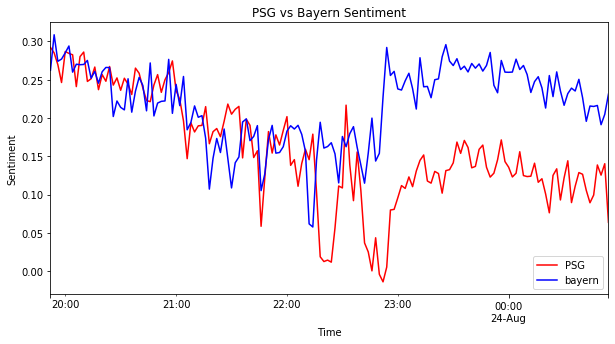

In [37]:

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_title('PSG vs Bayern Sentiment')


polarity_series_PSG.plot(ax=ax, color='red', label='PSG')
polarity_series_bay.plot(ax=ax, color='Blue', label='bayern')
ax.legend(loc='lower right')
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment')

# SELEZIONE GIOCATORI

In [ ]:
data = pd.read_csv('bayernpsg_translated_giocatori.csv', sep = ',', index_col=None, header=0, engine='python' , encoding='utf8')
del data['Unnamed: 0']
data2=data[['username','date','text','is_RT','translated','polarity']].dropna()

In [ ]:
data=data2.copy()

In [164]:
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data['date']= pd.DatetimeIndex(data['date']) + pd.offsets.Hour(2)
data['minutes']=data['date'].dt.strftime('%Y-%m-%d %H:%M')

In [12]:
ThiagoSilva =  data[data['translated'].str.contains('silva', case=False)]
ThiagoSilva_2 = ['Navas','Kehrer', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
ThiagoSilva = ThiagoSilva[ThiagoSilva['translated'].str.contains('|'.join(ThiagoSilva_2), case=False) == False]
ThiagoSilva


,username,date,text,is_RT,translated,polarity
date,,,,,,
2020-08-23 19:52:57,Divock Origi ðŸ”¥ðŸ”¥,2020-08-23 19:52:57,PSG captain Thiago Silva will play his last ga...,True,PSG captain Thiago Silva will play his last ga...,-0.133333
2020-08-23 19:53:02,cunha,2020-08-23 19:53:02,"Thiago Silva, merece um final feliz nesse PSG",False,"Thiago Silva, deserves a happy ending at this PSG",0.800000
2020-08-23 19:53:13,sparkingg ðŸ‡§ðŸ‡·ðŸ‡µðŸ‡¹,2020-08-23 19:53:13,@DanSilvaO3 @leandrorafaelz Ja comprei ingress...,False,@ DanSilvaO3 @leandrorafaelz I already bought ...,0.200000
2020-08-23 19:53:24,WAGNH,2020-08-23 19:53:24,CL Final open thread / live blog / Thiago Silv...,False,CL Final open thread / live blog / Thiago Silv...,0.045455
2020-08-23 19:53:24,andrey,2020-08-23 19:53:24,"ltimo jogo do monstro Thiago Silva pelo Psg, q...",False,"last game of the monster Thiago Silva for Psg,...",-0.200000
...,...,...,...,...,...,...
2020-08-24 00:53:41,MajorðŸŒ¿,2020-08-24 00:53:41,Last match tonight for #ThiagoSilva with #PSG....,True,Last match tonight for #ThiagoSilva with #PSG....,0.410000
2020-08-24 00:53:48,Douglas,2020-08-24 00:53:48,"Thiago Silva, Ben Chilwell, Kai Havertz, Hakim...",True,"Thiago Silva, Ben Chilwell, Kai Havertz, Hakim...",0.250000
2020-08-24 00:53:53,"Osho,Oluwatoba",2020-08-24 00:53:53,Thiago Silva nows ready to start a new chapter...,True,Thiago Silva nows ready to start a new chapter...,0.204040


In [165]:
Musiala = data[data['translated'].str.contains('Musiala', case=False)]
Zirkzee = data[data['translated'].str.contains('zirkzee', case=False)]
Coman = data[data['translated'].str.contains('coman', case=False)]
Tolisso = data[data['translated'].str.contains('tolisso', case=False)]
Hernandez = data[data['translated'].str.contains('hernandez', case=False)]
Cuisance = data[data['translated'].str.contains('cuisance', case=False)]
Coutinho = data[data['translated'].str.contains('coutinho', case=False)]
JaviMartinez = data[data['translated'].str.contains('javimartinez', case=False)]
Pavard = data[data['translated'].str.contains('pavard', case=False)]
Süle = data[data['translated'].str.contains('sule', case=False)]
Odriozola = data[data['translated'].str.contains('odriozola', case=False)]
Hoffmann =  data[data['translated'].str.contains('hoffmann', case=False)]
Ulreich =  data[data['translated'].str.contains('Ulreich', case=False)]
Flick =  data[data['translated'].str.contains('Flick', case=False)]
Lewandowski =  data[data['translated'].str.contains('Lewandowski', case=False)]
Perisic =  data[data['translated'].str.contains('Perisic', case=False)]
Muller = data[data['translated'].str.contains('Muller', case=False)]
Gnabry =  data[data['translated'].str.contains('Gnabry', case=False)]
ThiagoAlcantara =  data[data['translated'].str.contains('ThiagoAlcantara', case=False)]
Goretzka =  data[data['translated'].str.contains('Goretzka', case=False)]
Davies =  data[data['translated'].str.contains('davies', case=False)]
Navas =  data[data['translated'].str.contains('navas', case=False)]
Kehrer =  data[data['translated'].str.contains('Kehrer', case=False)]
ThiagoSilva =  data[data['translated'].str.contains('ThiagoSilva', case=False)]
Alaba =  data[data['translated'].str.contains('alaba', case=False)]
Choupo_Moting =  data[data ['translated'].str.contains('Choupo_Moting', case=False)]
Icardi =  data[data['translated'].str.contains('Icardi', case=False)]
Neuer =  data[data['translated'].str.contains('Neuer', case=False)]
Kimmich =  data[data['translated'].str.contains('kimmich', case=False)]
Boateng =  data[data['translated'].str.contains('Boateng', case=False)]
Draxler =  data[data['translated'].str.contains('Draxler', case=False)]
Sarabia =  data[data['translated'].str.contains('Sarabia', case=False)]
Kimpembe =  data[data['translated'].str.contains('Kimpembe', case=False)]
Bernat =  data[data['translated'].str.contains('Bernat', case=False)]
Verratti =  data[data['translated'].str.contains('Verratti', case=False)]
Marquinhos =  data[data['translated'].str.contains('Marquinhos', case=False)]
Herrera =  data[data['translated'].str.contains('Herrera', case=False)]
DiMaria =  data[data['translated'].str.contains('dimaria', case=False)]
Mbappé =  data[data['translated'].str.contains('mbappe', case=False)]
Neymar =  data[data['translated'].str.contains('neymar', case=False)]
Tuchel =  data[data['translated'].str.contains('Tuchel', case=False)]
Rico =  data[data['translated'].str.contains('Rico', case=False)]
Bulka =  data[data['translated'].str.contains('Bulka', case=False)]
Dagba =  data[data['translated'].str.contains('Dagba', case=False)]
Diallo =  data[data['translated'].str.contains('Diallo', case=False)]
Kurzawa =  data[data['translated'].str.contains('Kurzawa', case=False)]
Paredes =  data[data['translated'].str.contains('Paredes', case=False)]
Gueye =  data[data['translated'].str.contains('Gueye', case=False)]
Bekker =  data[data['translated'].str.contains('Bekker', case=False)]

In [166]:
Musiala_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee']
Neymar_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee','Musiala','mbapp','mbappe']
Zirkzee_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Musiala']
Coman_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Zirkzee', 'Musiala']
Tolisso_2 =['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Coman', 'Zirkzee', 'Musiala']
Hernandez_2 =['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance',  'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Cuisance_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Coutinho_2 =['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
JaviMartinez_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard',  'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Pavard_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle',  'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Süle_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Süle',   'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Odriozola_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Süle', 'Odriozola',  'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Hoffmann_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann',  'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Ulreich_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Flick_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski',  'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Lewandowski_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Flick',  'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Perisic_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Lewandowski',  'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Muller_2 =['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Gnabry_2 =['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
ThiagoAlcantara_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Goretzka_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies',  'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Davies_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba',  'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Navas_2 = ['Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Kehrer_2 = ['Navas','ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
ThiagoSilva_2 = ['Navas','Kehrer', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Choupo_Moting_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Icardi_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Neuer_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Kimmich_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer','Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Boateng_2 =['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Alaba_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Draxler_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Sarabia_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler','Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Kimpembe2=['Navas','Kehrer', 'ThiagoSilva', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Bernat2=['Kimpembe','Navas','Kehrer', 'ThiagoSilva',  'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Verratti2=['Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Marquinhos2=['Verratti','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva', 'Herrera', 'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Herrera2=['Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva',  'DiMaria', 'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
DiMaria2=['Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Mbappe', 'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Mbappé2=['Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Neymar_2 = ['Navas','Kehrer', 'ThiagoSilva', 'Kimpembe', 'Bernat', 'Verratti', 'Marquinhos', 'Herrera', 'DiMaria', 'Mbappé', 'Tuchel', 'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee','Musiala','mbapp','mbappe']
Tuchel2=['mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'Rico', 'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Rico2=['tuchel','mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'Bulka', 'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Bulka2=['rico','tuchel','mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'Diallo', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Diallo2=['bulka','tuchel','mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'bulka', 'Bakker', 'Dagba', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Dagba2=['bulka','tuchel','mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'bulka', 'Bakker', 'diallo', 'Kurzawa', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Kurzawa2=['bulka','tuchel','mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'bulka', 'Bakker', 'diallo', 'dagba', 'Paredes', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Paredes2=['bulka','tuchel','mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'bulka', 'Bakker', 'diallo', 'dagba', 'kurzawa', 'Gueye', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Gueye2=['bulka','tuchel','mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'bulka', 'Bakker', 'diallo', 'dagba', 'kurzawa', 'paredes', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']
Bekker_2=['gueye','bulka','tuchel','mbappe','Dimaria','Verratti','Marquinhos','Bernat','Kimpembe','Navas','Kehrer', 'ThiagoSilva','Herrera',  'Neymar',  'bulka',  'diallo', 'dagba', 'kurzawa', 'paredes', 'Draxler', 'Sarabia', 'Choupo-Moting', 'Icardi', 'Neuer', 'Kimmich', 'Boateng', 'Alaba', 'Davies', 'Goretzka', 'ThiagoAlcantara', 'Gnabry', 'Muller', 'Perisic', 'Lewandowski', 'Flick', 'Ulreich', 'Hoffmann', 'Odriozola', 'Süle', 'Pavard', 'JaviMartinez', 'Coutinho', 'Cuisance', 'Hernandez', 'Tolisso', 'Coman', 'Zirkzee', 'Musiala']



Musiala = Musiala[Musiala['translated'].str.contains('|'.join(Musiala_2), case=False) == False]
Zirkzee = Zirkzee[Zirkzee['translated'].str.contains('|'.join(Zirkzee_2), case=False) == False]
Coman = Coman[Coman['translated'].str.contains('|'.join(Coman_2), case=False) == False]
Tolisso = Tolisso[Tolisso['translated'].str.contains('|'.join(Tolisso_2), case=False) == False]
Hernandez = Hernandez[Hernandez['translated'].str.contains('|'.join(Hernandez_2), case=False) == False]
Cuisance = Cuisance[Cuisance['translated'].str.contains('|'.join(Cuisance_2), case=False) == False]
Coutinho = Coutinho[Coutinho['translated'].str.contains('|'.join(Coutinho_2), case=False) == False]
JaviMartinez = JaviMartinez[JaviMartinez['translated'].str.contains('|'.join(JaviMartinez_2), case=False) == False]
Pavard = Pavard[Pavard['translated'].str.contains('|'.join(Pavard_2), case=False) == False]
Süle = Süle[Süle['translated'].str.contains('|'.join(Süle_2), case=False) == False]
Odriozola = Odriozola[Odriozola['translated'].str.contains('|'.join(Odriozola_2), case=False) == False]
Hoffmann = Hoffmann[Hoffmann['translated'].str.contains('|'.join(Hoffmann_2), case=False) == False]
Ulreich = Ulreich[Ulreich['translated'].str.contains('|'.join(Ulreich_2), case=False) == False]
Flick = Flick[Flick['translated'].str.contains('|'.join(Flick_2), case=False) == False]
Lewandowski = Lewandowski[Lewandowski['translated'].str.contains('|'.join(Lewandowski_2), case=False) == False]
Perisic = Perisic[Perisic['translated'].str.contains('|'.join(Perisic_2), case=False) == False]
Muller = Muller[Muller['translated'].str.contains('|'.join(Muller_2), case=False) == False]
Gnabry = Gnabry[Gnabry['translated'].str.contains('|'.join(Gnabry_2), case=False) == False]
ThiagoAlcantara = ThiagoAlcantara[ThiagoAlcantara['translated'].str.contains('|'.join(ThiagoAlcantara_2), case=False) == False]
Goretzka = Goretzka[Goretzka['translated'].str.contains('|'.join(Goretzka_2), case=False) == False]
Davies = Davies[Davies['translated'].str.contains('|'.join(Davies_2), case=False) == False]
Navas = Navas[Navas['translated'].str.contains('|'.join(Navas_2), case=False) == False]
Kehrer = Kehrer[Kehrer['translated'].str.contains('|'.join(Kehrer_2), case=False) == False]
ThiagoSilva = ThiagoSilva[ThiagoSilva['translated'].str.contains('|'.join(ThiagoSilva_2), case=False) == False]
Alaba = Alaba[Alaba['translated'].str.contains('|'.join(Alaba_2), case=False) == False]
Choupo_Moting = Choupo_Moting[Choupo_Moting ['translated'].str.contains('|'.join(Choupo_Moting_2), case=False) == False]
Icardi = Icardi[Icardi['translated'].str.contains('|'.join(Icardi_2), case=False) == False]
Neuer = Neuer[Neuer['translated'].str.contains('|'.join(Neuer_2), case=False) == False]
Kimmich = Kimmich[Kimmich['translated'].str.contains('|'.join(Kimmich_2), case=False) == False]
Boateng = Boateng[Boateng['translated'].str.contains('|'.join(Boateng_2), case=False) == False]
Draxler = Draxler[Draxler['translated'].str.contains('|'.join(Draxler_2), case=False) == False]
Sarabia = Sarabia[Sarabia['translated'].str.contains('|'.join(Sarabia_2), case=False) == False]
Kimpembe = Kimpembe[Kimpembe['translated'].str.contains('|'.join(Kimpembe2), case=False) == False]
Bernat = Bernat[Bernat['translated'].str.contains('|'.join(Bernat2), case=False) == False]
Verratti = Verratti[Verratti['translated'].str.contains('|'.join(Verratti2), case=False) == False]
Marquinhos = Marquinhos[Marquinhos['translated'].str.contains('|'.join(Marquinhos2), case=False) == False]
Herrera = Herrera[Herrera['translated'].str.contains('|'.join(Herrera2), case=False) == False]
DiMaria = DiMaria[DiMaria['translated'].str.contains('|'.join(DiMaria2), case=False) == False]
Mbappé = Mbappé[Mbappé['translated'].str.contains('|'.join(Mbappé2), case=False) == False]
Neymar = Neymar[Neymar['translated'].str.contains('|'.join(Neymar_2), case=False) == False]
Tuchel = Tuchel[Tuchel['translated'].str.contains('|'.join(Tuchel2), case=False) == False]
Rico = Rico[Rico['translated'].str.contains('|'.join(Rico2), case=False) == False]
Bulka = Bulka[Bulka['translated'].str.contains('|'.join(Bulka2), case=False) == False]
Dagba = Dagba[Dagba['translated'].str.contains('|'.join(Dagba2), case=False) == False]
Diallo = Diallo[Diallo['translated'].str.contains('|'.join(Diallo2), case=False) == False]
Kurzawa = Kurzawa[Kurzawa['translated'].str.contains('|'.join(Kurzawa2), case=False) == False]
Paredes = Paredes[Paredes['translated'].str.contains('|'.join(Paredes2), case=False) == False]
Gueye = Gueye[Gueye['translated'].str.contains('|'.join(Gueye2), case=False) == False]
Bekker = Bekker[Bekker['translated'].str.contains('|'.join(Bekker_2), case=False) == False]


In [66]:
Neymar

,username,date,text,is_RT,translated,polarity,minutes
0,FaelðŸ˜,2020-08-23 19:52:49,Hoje o pai t on em campo com o Neymar https:/...,True,Today the father is on the field with Neymar h...,0.000000,2020-08-23 19:52
5,Vickyy,2020-08-23 19:52:49,se o neymar colocar baroes da pisadinha antes ...,True,if neymar puts baroes from step before enterin...,0.000000,2020-08-23 19:52
6,Rafa,2020-08-23 19:52:49,Only Neymar would show up to the Champions Lea...,True,Only Neymar would show up to the Champions Lea...,0.000000,2020-08-23 19:52
15,Adryan ðŸ�¹,2020-08-23 19:52:49,Neymar de Juliet e Moicano a caminho do estdio...,True,Neymar de Juliet and Moicano on the way to the...,0.000000,2020-08-23 19:52
16,letÃ­cia belo horizonte,2020-08-23 19:52:49,NEYMAR ESCUTANDO S LOVE KKKKKKKKKKKKKKKKKKKKKK...,True,NEYMAR LISTENING S LOVE AND STILL KKKKKKKKKKKK...,0.500000,2020-08-23 19:52
...,...,...,...,...,...,...,...
897171,á�€Ï´á�™áŽ¬áŽ¡Î�Ï´áŽ¡ ðŸ‘»â–ªï¸�,2020-08-24 00:54:16,Hazard and Neymar are both attackers...you can...,True,Hazard and Neymar are both attackers...you can...,0.500000,2020-08-24 00:54
897177,jogador caro,2020-08-24 00:54:16,Neymar Jnior. O absurdo jogador brasileiro que...,True,Neymar Junior. The absurd Brazilian player who...,0.133333,2020-08-24 00:54
897182,Lorena,2020-08-24 00:54:16,Brasileiros que ficam felizes com a tristeza d...,True,Brazilians who are happy with the sadness of t...,0.650000,2020-08-24 00:54
897188,Jimmy Conway,2020-08-24 00:54:16,@igor_3k @flowpdc @neymarjr Quem liga pra neym...,False,@ igor_3k @flowpdc @neymarjr Who cares about n...,0.000000,2020-08-24 00:54


In [70]:
#cambio da punto a vurgola per poter leggere il file in tableau

Neymar.polarity=Neymar.polarity.apply(str)

cols_to_change = ['polarity']

for col in cols_to_change:
    
    Neymar[col] = Neymar[col].str.replace('.', ',')

In [71]:
Neymar

,is_RT,polarity
minutes,,
2020-08-23 19:52:00,0.721649,"0,16107844716494843"
2020-08-23 19:53:00,0.687726,"0,13940890792412747"
2020-08-23 19:54:00,0.682676,"0,14736679596222096"
2020-08-23 19:55:00,0.723104,"0,16611959008169533"
2020-08-23 19:56:00,0.690516,"0,1656616955212558"
...,...,...
2020-08-24 00:50:00,0.705495,"0,03333135383135382"
2020-08-24 00:51:00,0.712018,"0,04988487610351981"
2020-08-24 00:52:00,0.685345,"0,06324588052632235"


In [ ]:
stat = pd.read_csv('statistiche.csv', sep = ';', index_col=None, header=0, engine='python' , encoding='utf8')

In [159]:
stat['sentiment'] = 0

In [156]:
ThiagoSilva.polarity.mean()

0.32776849233502375

In [ ]:
stat.set_value(2, 'sentiment', 0.32776849233502375)

In [ ]:
stat['numbers_tweets'] = 0

In [ ]:
ThiagoSilva.count()

In [ ]:
stat.set_value(2, 'numbers_tweets', 2008)

# DATI PARTITA

In [129]:
stat = pd.read_csv('statistiche.csv', sep = ';', index_col=None, header=0, engine='python' , encoding='utf8')

In [96]:
stat.head()

,Giocatore,Tiri,Tiri porta,Pass chiave,percentuale passaggi,Duelli aerei,Tocchi,Voto,Dribling falliti,Falli subiti,Fuorigioco,Contrasti subiti,Palle perse,Passaggi intercettati,Spazzate,Tiri respinti,Falli commessi,Squadra
0,Keylor Navas,0,0,0,65.4,0,34.0,5.95,0,0,0,0,0,0,0,0,0,PSG
1,Thilo Kehrer,0,0,0,65.5,1,53.0,6.38,0,4,0,2,2,0,0,1,1,PSG
2,Thiago Silva,0,0,0,80.9,3,57.0,6.55,0,1,0,0,0,1,6,1,1,PSG
3,Presnel Kimpembe,0,0,0,83.9,1,41.0,6.32,1,1,0,1,0,0,4,1,0,PSG
4,Juan Bernat,0,0,1,86.4,3,47.0,6.97,1,3,0,0,0,3,3,0,0,PSG


In [104]:
stat['percentuale passaggi']=stat['percentuale passaggi'].apply(str)

cols_to_change = ['percentuale passaggi']

for col in cols_to_change:
    
    stat[col] = stat[col].str.replace('.', ',')

In [105]:
stat.Voto=stat.Voto.apply(str)

cols_to_change = ['Voto']

for col in cols_to_change:
    
    stat[col] = stat[col].str.replace('.', ',')

In [106]:
statBay = stat[stat['Squadra'].str.contains('Bayern', regex=False, case=False, na=False)]

In [107]:
statPSG = stat[stat['Squadra'].str.contains('PSG', regex=False, case=False, na=False)]

In [108]:
statPSG.to_excel('statPSG.xlsx', index=True)
statBay.to_excel('statBay.xlsx', index=True)

In [27]:
cronaca = pd.read_csv('cronaca.csv', sep = ';', index_col=None, header=0, engine='python' , encoding='utf8')

# PREPARAZIONI DATI PER TABLEAU

In [38]:
dfs = pd.read_csv('bayernpsg_translated_unito.csv', sep = ',', index_col=None, header=0, engine='python' , encoding='utf8')
del dfs['Unnamed: 0']
dfs2=dfs[['username','date','text','is_RT','translated','polarity']].dropna()

In [39]:
dfs=dfs2.copy()

In [40]:
dfs = dfs.loc[dfs['polarity'] != 0]

dfs['date'] =  pd.to_datetime(dfs['date'], format='%Y-%m-%d %H:%M:%S')
dfs['date']= pd.DatetimeIndex(dfs['date']) + pd.offsets.Hour(2)
dfs['minutes']=dfs['date'].dt.strftime('%Y-%m-%d %H:%M')

dfs.set_index(pd.DatetimeIndex(dfs['minutes']), inplace=True)

In [41]:

dfs['polarity'] = pd.to_numeric(dfs['polarity'])

data_PSG = dfs[dfs['translated'].str.contains('PSG', case=False)]
data_PSG = data_PSG[data_PSG['translated'].str.contains('bayern', case=False) == False]

data_bay = dfs[dfs['translated'].str.contains('bayern', case=False)]
data_bay = data_bay[data_bay['translated'].str.contains('PSG', case=False) == False]

In [42]:
data_PSG=data_PSG[['polarity']]
data_bay=data_bay[['polarity']]

In [43]:
data_PSG=data_PSG.resample('1Min').mean()

data_bay=data_bay.resample('1Min').mean()

In [44]:
data_PSG['minutes'] = data_PSG.index
data_bay['minutes'] = data_bay.index


In [45]:
data=pd.merge(data_PSG, data_bay, left_index=True, right_index=True)


In [46]:
data2 = data.rename(columns={'polarity_x': 'PSG','polarity_y': 'Bayern'})
data2

,PSG,minutes_x,Bayern,minutes_y
minutes,,,,
2020-08-23 19:52:00,0.271925,2020-08-23 19:52:00,0.356964,2020-08-23 19:52:00
2020-08-23 19:53:00,0.295440,2020-08-23 19:53:00,0.242207,2020-08-23 19:53:00
2020-08-23 19:54:00,0.306319,2020-08-23 19:54:00,0.268155,2020-08-23 19:54:00
2020-08-23 19:55:00,0.265967,2020-08-23 19:55:00,0.356220,2020-08-23 19:55:00
2020-08-23 19:56:00,0.273069,2020-08-23 19:56:00,0.286907,2020-08-23 19:56:00
...,...,...,...,...
2020-08-24 00:50:00,0.135335,2020-08-24 00:50:00,0.167218,2020-08-24 00:50:00
2020-08-24 00:51:00,0.116619,2020-08-24 00:51:00,0.214435,2020-08-24 00:51:00
2020-08-24 00:52:00,0.144655,2020-08-24 00:52:00,0.220887,2020-08-24 00:52:00


In [47]:
data2.PSG=data2.PSG.apply(str)
data2.Bayern=data2.Bayern.apply(str)

In [48]:
cols_to_change = ['PSG']

for col in cols_to_change:
    
    data2[col] = data2[col].str.replace('.', ',')
    
    
    
cols_to_change = ['Bayern']

for col in cols_to_change:
    
    data2[col] = data2[col].str.replace('.', ',')